# **Lab 1: Exploring Table Data**

In [49]:
import warnings

import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

import umap
import umap.plot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Pandas: 2.0.3
Numpy: 1.24.3


## **1: Business Understanding**

### **1.1: Dataset Overview**

The "Loan Default Dataset" <a href="https://www.kaggle.com/datasets/yasserh/loan-default-dataset">on Kaggle</a> offers a comprehensive view of past data on loan borrowers. This dataset contains several important attributes from fundamental borrower demographics such as gender and age, to more detailed financial markers like debt-to-income and loan-to-value ratios. Originating from real loan applications, this dataset offers a blend of borrower-specific details, loan purpose, and other influential parameters that might affect the chance of a borrower defaulting on a loan. While Kaggle does not state much about the origins of this dataset, and because this data contains very real information about loan borrowers; we believe it is likely that the dataset was put together by leaders in the financial industry, pseudonomynized for privacy and legal reasons, and distributed with the intention of enabling data scientists in the public to create a machine learning model that outperforms their current strategies for predicting loan defaults. Such a strategy is smart, because it allows for leading banks and lending institutions to not have to invest money in a data science team that fails to deliver successful ROI.

Investing in a data team is risky and expensive. According to the <a href="https://www.datascience-pm.com/project-failures/">Data Science Process Alliance</a>, around only 20% of analytics projects deliver successful results, and only around 15% of machine learning models make it to production. Because of pessimistic trends such as these, it makes sense that these leading banks and lending institutions in the financial industry would look for a more risk-averse option by releasing a dataset to the public. At that point, they can then potentially pay someone who built a model that outperforms what they are currently doing, or they can even use a machine learning model that someone releases to the open-souce community from this dataset.

### **1.2: Purpose of Data Collection**

The primary motive behind assembling this dataset was likely the financial sector's persistent challenge with loan defaults. According to page 4 of a report about <a href="https://www.mckinsey.com/~/media/mckinsey/industries/financial%20services/our%20insights/ai%20powered%20decision%20making%20for%20the%20bank%20of%20the%20future/ai-powered-decision-making-for-the-bank-of-the-future.pdf">AI-powered decision-making for banks</a> from McKinsey & Co., with a revenue structure leaning heavily on loan interests, it's essential for lending institutions to ensure expected returns on loans. Loan defaults severely erode revenues, and, in massive scales, can threaten <a href="https://www.fdic.gov/bank/historical/history/3_85.pdf">the entire banking system's stability</a> according to the FDIC on page 29. Therefore, this dataset was developed to aid banks and similar institutions in foreseeing potential defaults, providing them with an analytical edge to make more informed lending choices.

### **1.3: Prediction Task & Stakeholder Interest**

The intention of the Kaggle dataset being released is to determine the likelihood of a borrower defaulting on their loan. We have spoken primarily about banks and lending institutions, but as can be extrapolated from <a href="https://ncua.gov/newsroom/speech/2023/ncua-board-member-rodney-e-hoods-remarks-women-housing-and-finance-symposium-washington-dc">Rodney E. Hood's remarks</a> to the Women in Finance & Housing Symposium, even outside of the scope we defined earlier, continuous success in this prediction task can be extremely valuable to other stakeholders in the financial ecosystem, such as credit agencies, insurance companies, and even potential investors. By understanding the factors that contribute to loan defaults, these entities can make better-informed decisions, tailor products, or adjust strategies based on these insights.

### **1.4: Algorithm Performance Expectation for Profitability**

In order for this task to deliver successful ROI, a classification algorithm would need to gain deeper, more insightful correlations with loan defaults. The algorithm's success in predicting loan defaults using all the variables in the dataset must be superior in accuracy, time efficiency, and scalability compared to current methods being used right now for it to be deemed beneficial. Simply put, a useful algorithm would be one that not only predicts loan defaults with high accuracy but does so faster and more reliably than current banking practices. Such an algorithm would offer these stakeholders a genuine edge in decision-making, risk management, and strategic planning.

## **2: Data Understanding**

Here is a snapshot of exactly what the dataset looks like:

In [51]:
df: pd.DataFrame = pd.read_csv("Dataset/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Throughout this section, we will dive deep into the structure of the data to gain a much stronger essense of data understanding.

### **2.1: Dataset Size**

In [52]:
row_count, col_count = df.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 148670 rows and 34 columns.


The dataset contains approximately 150,000 rows, signaling that we have a sufficient count of borrower data points to infer exactly what kind of variable differences lead to higher or lower chances in loan defaults. Based on the number of columns in the dataset, it seems as if we also have a lot of holistically descriptive information to identify exactly what factors came into play when a borrower defaulted on their loan. One thing we will investigate are the `null` values in these columns to see how much information the columns actually have.  Let's take a look at that phenomenon right now, but first, we should mainly focus on investigating the context and data types of our table schema.

### **2.2: Summarizing the Dataset Schema**

The "Loan Default Dataset" contains the following columns.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

The dataset did not have a data dictionary associated with it on Kaggle, so we had to extrapolate the meaning for a lot of these columns based on the context of the borrower default dataset, which required extensive research. Based on the table above and our understanding of the context of the dataset, here is some context into each attribute:

| Variable Name | Description | Analytical Performance | Data Type | Null Count |
|---------------|-------------|------------------------|-----------|------------|
|ID|Unique identifier for each record or loan application.|Allows us to check for duplicate data.|String|0|
|year|The year in which the loan application was made.|Allows for time-based analysis.|Int|0|
|loan_limit|Possibly a categorical variable indicating the loan limit category for the applicant.|Helps in understanding the capacity the applicant might be eligible for with their loan|Object|3,344 (~2.2%)|
|Gender|Indicates the gender of the loan applicant.|Provides demographic insights for loan defaults.|Object|0|
|approv_in_adv|Seems to specify whether the loan was pre-approved.|<a href="https://www.investopedia.com/terms/p/payday-loans.asp">Can give insights into the confidence level the bank had in certain applicants.</a>|Object|908 (~0.6%)|
|loan_type|Indicates the type of loan applied for.|Different types of loans may have different default rates or conditions.|Object|0|
|loan_purpose|Describes the reason for the loan.|Purpose of the loan can significantly influence the chances of repayment.|Object|134 (~0.1%)|
|Credit_Worthiness|Appears to be a rating or category indicating the creditworthiness of the borrower.|Directly influences the likelihood of the loan being repaid.|Object|0|
|open_credit|Indicates whether the applicant has other open lines of credit.|Multiple open credits can maybe influence an individual's financial health and repayment capacity.|Object|0|
|business_or_commercial|Specifies if the loan is for personal or business/commercial purposes.|Business loans might have different risks and repayment patterns compared to personal loans.|Object|0|
|loan_amount|The principal amount of loan that the applicant is seeking.|It directly influences the risk and returns for the bank. A larger loan amount might be a higher risk but can also bring in more interest revenue.|Object|0|
|loan_amount|The principal amount of loan that the applicant is seeking.|It directly influences the risk and returns for the bank. A larger loan amount might be a higher risk but can also bring in more interest revenue.|Object|0|
|rate_of_interest|The interest rate at which the loan will be lent to the borrower.|Higher interest rates might lead to higher returns but can also impact the borrower's ability to repay.|Float|36,439 (~24.5%)|
|Interest_rate_spread|Difference between the loan's interest rate and the base rate, showing the bank's margin.|<a href="https://www.investopedia.com/terms/n/net-interest-rate-spread.asp">Indicates the profitability margin for the bank on that specific loan.</a>|Float|36,639 (~24.6%)|
|Upfront_charges|Charges or fees that are to be paid upfront when the loan is disbursed.|Additional revenue for the bank and might deter less serious borrowers.|Float|39,642 (~26.7%)|
|term|The total number of days the loan is taken for.|<a href="https://www.quickenloans.com/learn/loan-terms#:~:text=A%20loan%20term%20is%20defined,to%20as%20that%20loan's%20term.">Influences the total interest accrued and the repayment period.</a>|Float|41 (~0.0%)|
|Neg_ammortization|(Negative Ammortization): "a provision that limits the amount of unpaid interest charges that can be added to the loan's principal balance," which is the initial size of a loan. Indicates whether the loan has a feature where the outstanding principal can increase rather than decrease.|<a href="https://www.investopedia.com/terms/n/negativeamortizationlimit.asp">Loans with negative amortization can pose higher risks as borrowers might owe more than initially borrowed.</a>|Object|121 (~0.1%)|
|interest_only|Specifies if the loan only requires interest payments for a certain period.|Interest-only loans can likely be riskier as the principal remains unchanged for a certain period.|Object|0|
|lump_sum_payment|Indicates if there's an option or requirement for a large payment at the end or during the loan term.|<a href="https://www.investopedia.com/terms/l/lump-sum-payment.asp">Can affect a borrower's ability to fully repay the loan.</a>|Object|0|
|property_value|The estimated value of the property that might be kept in case a borrower defaults on a loan. |Gives the bank an understanding of recoverable amounts in case of default.|Float|15,098 (~10.2%)|
|construction_type|Indicates the type or nature of property construction.|Different construction types may have varying market values.|Object|0|
|occupancy_type|Likely specifies whether the property is the primary residence or an investment.|Primary residences might have a lower risk of default compared to investment properties, but that's just a hypothesis.|Object|0|
|Secured_by|Details on what the loan is secured by.|<a href="https://www.investopedia.com/ask/answers/110614/what-difference-between-secured-and-unsecured-debts.asp">Secured loans typically pose less risk for banks. A loan backed by a home might be seen as less risky for banks than one backed by land.</a>|Object|0|
|total_units|Could refer to the number of units in the property, especially relevant for multi-family or commercial properties.|The value of properties can change based on the number of units.|Object|0|
|income|The income of the borrower.|Directly affects an individual's ability to repay the loan.|Float|9.150 (~6.2%)|
|credit_type|Indicates the type/source of the credit score.|Different credit bureaus may have slightly different scoring criteria, making credit score a variable that might not perform extremely well on its own.|Object|0|
|Credit_Score|The credit score of the borrower.|One of the primary indicators of creditworthiness and repayment likelihood used in the financial sector.|Int|0|
|co-applicant_credit_type|Credit type or source for the co-applicant if there is one.|The co-applicant's creditworthiness can influence the loan decision, especially if the main applicant has a weaker profile.|Object|0|
|age|Age category of the borrower.|Age can play a role in financial stability and repayment capacity.|Object|200 (~0.1%)|
|submission_of_application|Indicates how the application was submitted.|This could offer insights into which submission methods are more effective or attract more creditworthy borrowers.|Object|200 (~0.1%)|
|LTV|(Loan-to-Value Ratio): The ratio of the loan amount to the value of the appraised property value.|<a href="https://www.investopedia.com/terms/l/loantovalue.asp#:~:text=The%20loan%2Dto%2Dvalue%20(LTV)%20ratio%20is%20an,has%20a%20higher%20interest%20rate.">Lower LTV's are typically preferred in the eyes of lenders.</a>|Object|15,098 (~10.2%)|
|Region|The region from where the application originates.|Regional analysis can reveal localized economic trends or biases.|Object|0|
|Security_Type|Describes the type of security provided for the loan.|Different securities may have varying values, affecting risk.|Object|0|
|Security_Type|Describes the type of security provided for the loan.|Different securities may have varying values, affecting risk.|Object|0|
|status|Indicates whether or not a borrower defaulted on their loan.|The primary outcome variable for predicting loan defaults.|Bool|0|
|dtir1|Possibly the debt-to-income ratio.|<a href="https://www.investopedia.com/terms/d/dti.asp">Gives a snapshot of the borrower's financial obligations relative to their income, affecting their repayment capacity.</a>|Bool|24,121 (~16.2%)|

### **2.3: Diving Further Into Context, Understanding Attributes in Each Column**

We need to make sure that the DataFrame that we visualize can be contextually understood and interpretable by a computer. We do that by employing methods such as one-hot-encoding, turning a column of strings into a column of ordinal data, etc. To do this first, however, we need to evaluate all the contents inside each attribute and alongside context from the table above, derive some context and impute numerical values that we can then visualize and employ in a machine learning model predicting `status`. Later on, we will create a new dataframe in which we will store these values. First, let's look at the missing and duplicate data in the dataset.

#### **2.3.1: Checking for Duplicate Borrower Data**

The `ID` variables indicate individual observations, let's check if all of these rows representing variables associated with a specific row are duplicates of each other.

In [54]:
print(f"The ID attribute in the original dataset has {df['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

The ID attribute in the original dataset has 148670 unique values, and there are 148670 rows in total in the dataset.


We can now conclude that each of these rows are distinct rows, so we can proceed knowing our dataset does not have duplicates.

#### **2.3.2: Exploring NaN Values through Visualization**

Before diving deep into the context of each individual column, we should check out the existence of `NaN` values in our dataset to interpret what exactly we are working with in our dataset.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

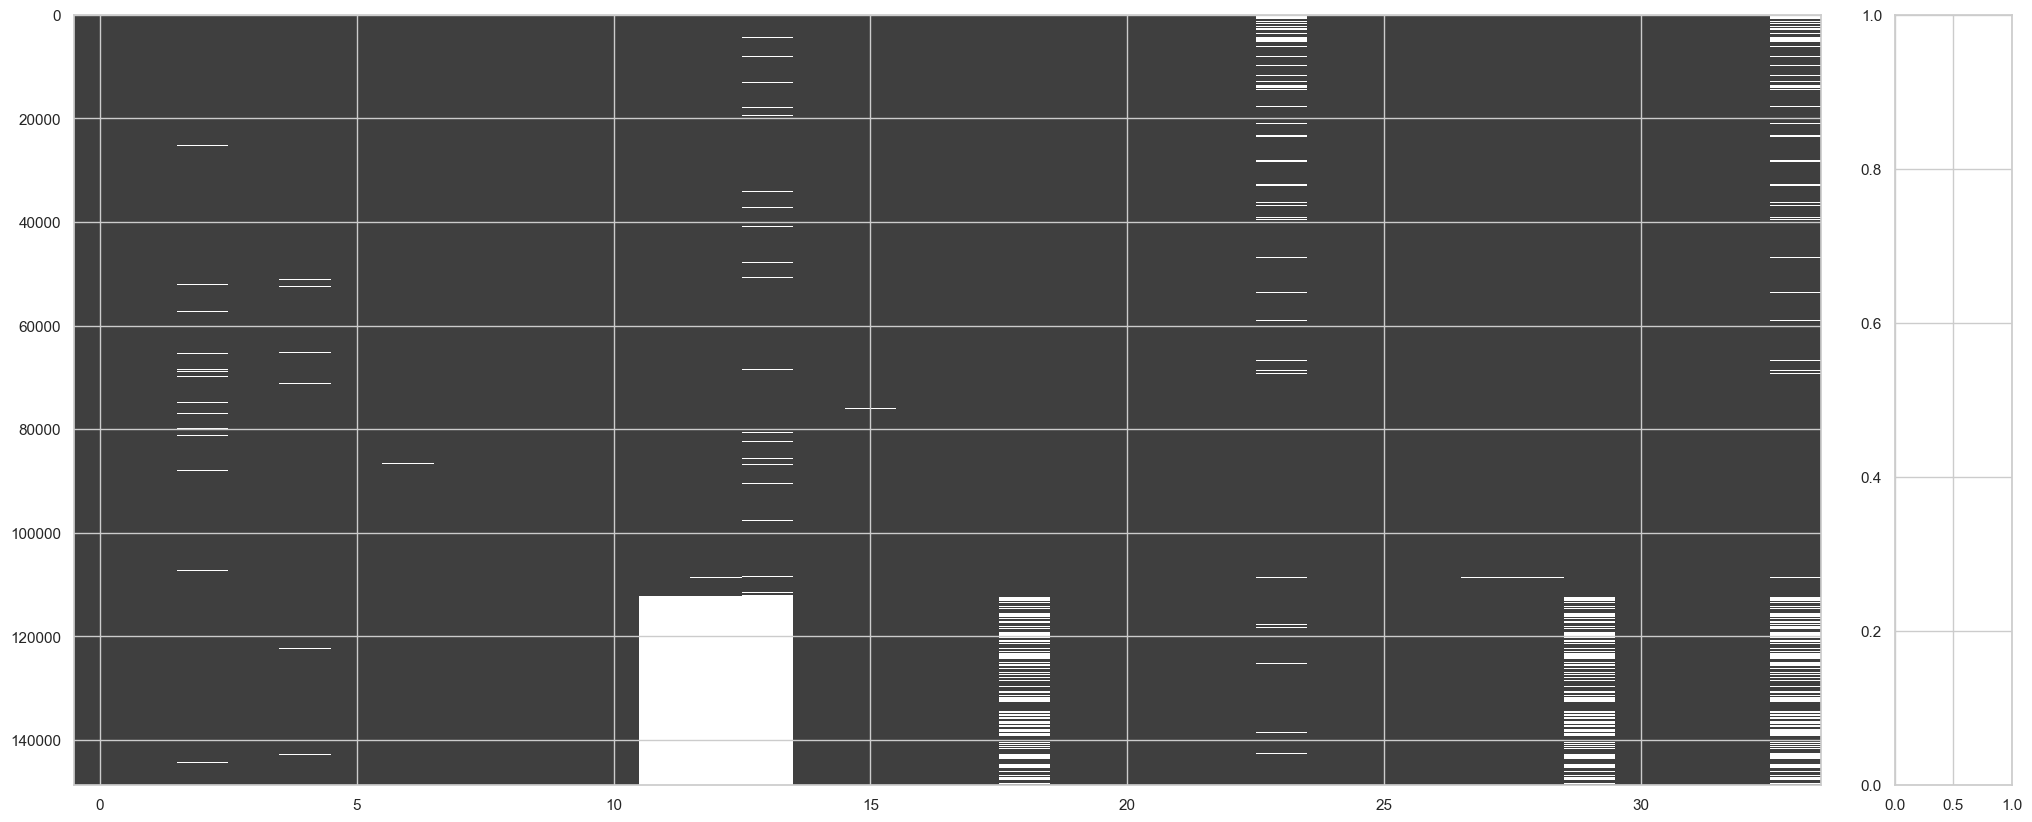

In [55]:
# Sort so that all the NaN values in the "rate_of_interest" column
# are on the bottom
df_sorted_for_nan_transparency = df.sort_values(by="rate_of_interest")

mn.matrix(df_sorted_for_nan_transparency)
plt.title("Sorted NaN Value Exploration",fontsize=30)
plt.show()

When speaking in terms of `NaN` values, our dataset is not that messy. Most of the columns have the vast majority of values already filled in, and even the columns with more `NaN` values still appear to have over 50% of their values filled in. This means that within the context of predicting loan defaults, we should assume that every predictor is important until proven otherwise. We believe that we will not remove any column for the sole purpose that they have a large amount of `NaN` values, even for the `rate_of_interest`, `Interest_rate_spread`, and `Upfront_charges` attributes which appear to relatively have a lot of `NaN` values. If there is another justification for removing an attribute later on, we will deal with that accordingly.

Something really important to explore here is that the `NaN` values that appear in the `rate_of_interest`, `Interest_rate_spread`, `Upfront_charges`, `property_value`, `LTV`, and `dtir1` columns exist in the same rows. This trend can be even more prominently seen in the `rate_of_interest`, `Interest_rate_spread`, and `Upfront_charges` columns. Because there is a missing property value in rows where all 6 of the values in these columns are equal to `NaN`, we can conclude that the borrowers did not apply for these loans to purchase a property if we assume that property values were collected for all loans related to purchasing a property. The data collection mechanism used for loans not related to purchasing a property did not factor in all these variables.

We want to explore if these `NaN` values appear more if a loan is applied for for business and commercial purposes.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

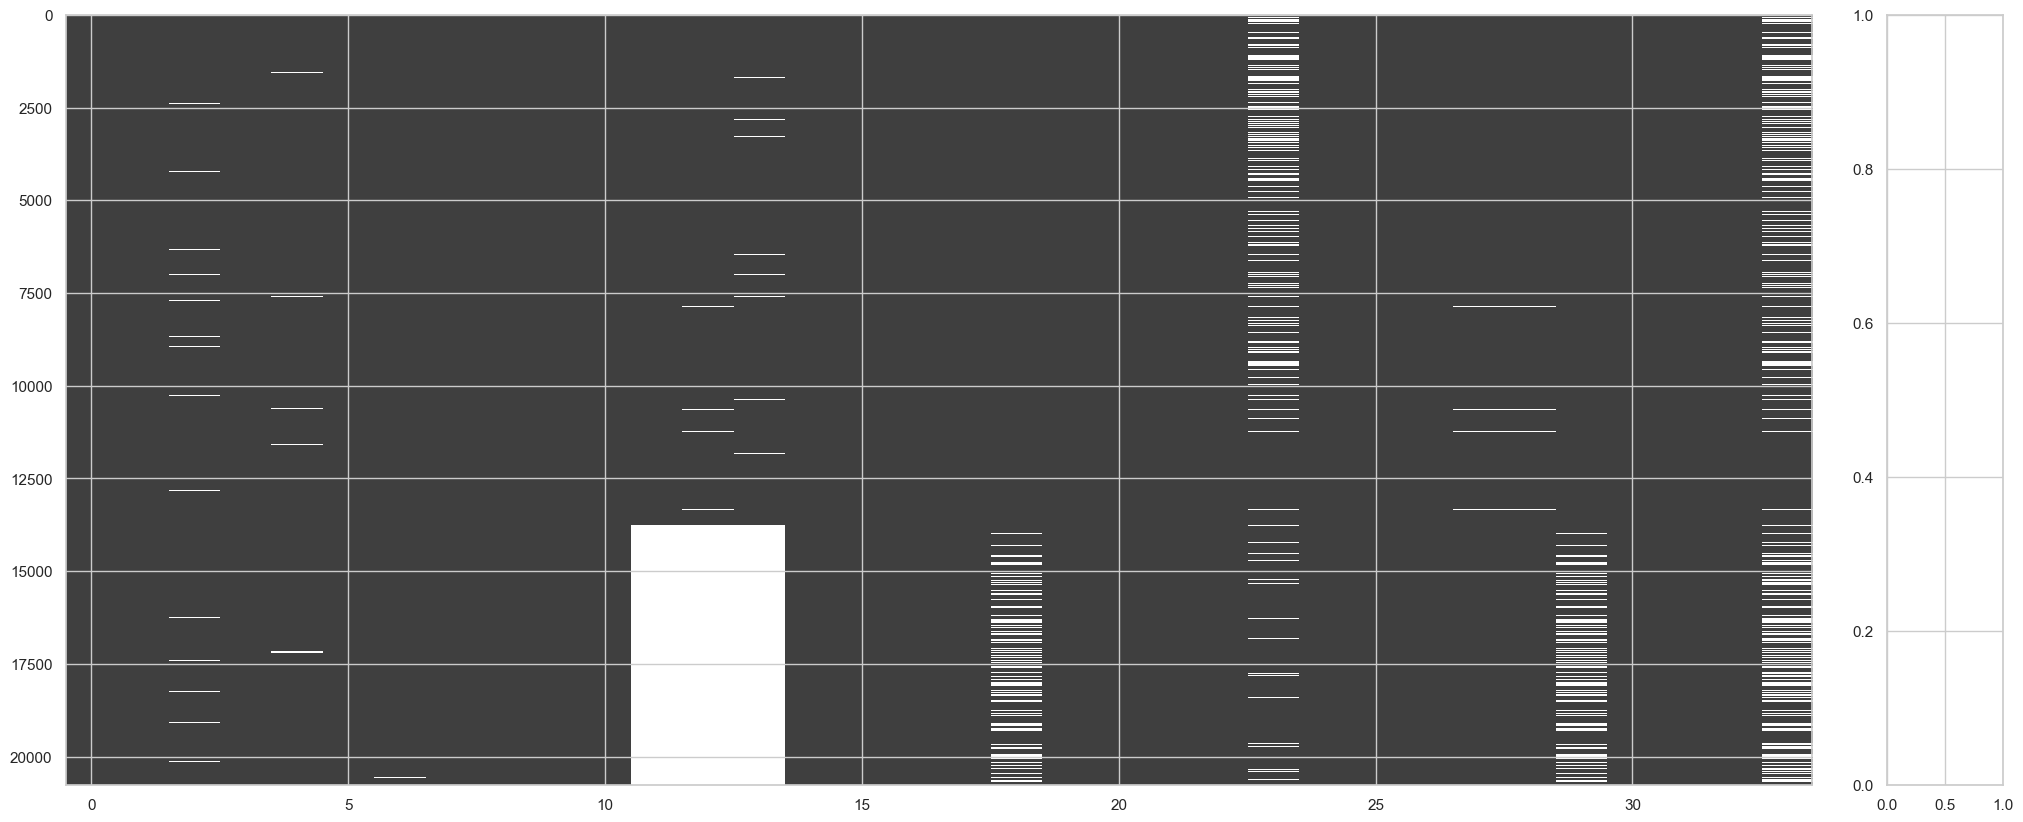

In [56]:
# Use boolean indexing to create df with only business or commercial loans
bc_rows: pd.Series = df_sorted_for_nan_transparency["business_or_commercial"] == "b/c"
df_sorted_nans_and_bc: pd.DataFrame = df_sorted_for_nan_transparency[bc_rows]

# Plot missing values matrix
mn.matrix(df_sorted_nans_and_bc)
plt.title("Sorted NaN Value Exploration for Business or Commercial Loans",fontsize=25)
plt.show()

# Interpret NaN count to offset scaling issue
total_rate_of_interest_nulls: int = df_sorted_nans_and_bc["rate_of_interest"].isna().sum()
total_property_value_nulls: int = df_sorted_nans_and_bc["property_value"].isna().sum()
print(f"The rate_of_interest column has {total_rate_of_interest_nulls} NaN values.")
print(f"{100*total_rate_of_interest_nulls/df_sorted_nans_and_bc.shape[0]:.2f}% of the total rows have a rate_of_interest NaN value.")
print(f"{100*total_property_value_nulls/df_sorted_nans_and_bc.shape[0]:.2f}% of the total rows have a property_value NaN value.")

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

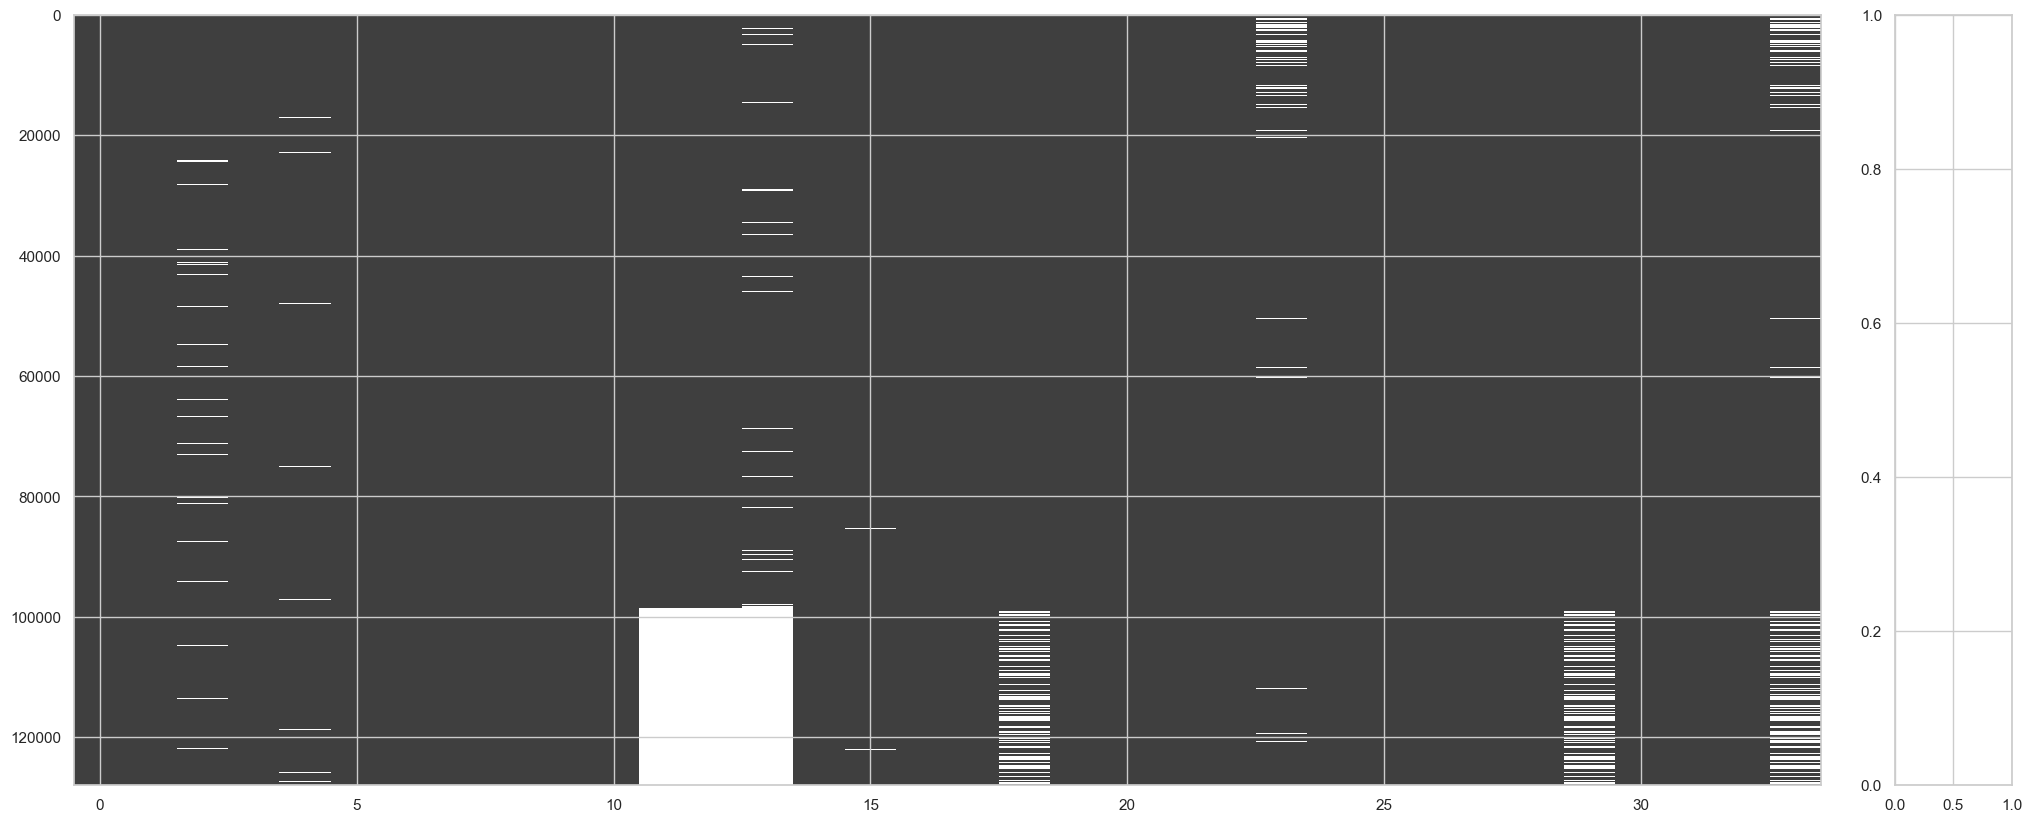

In [57]:
# Use boolean indexing to create df with only business or commercial loans
nobc_rows: pd.Series = df_sorted_for_nan_transparency["business_or_commercial"] == "nob/c"
df_sorted_nans_and_nobc: pd.DataFrame = df_sorted_for_nan_transparency[nobc_rows]

# Plot missing values matrix
mn.matrix(df_sorted_nans_and_nobc)
plt.title("Sorted NaN Value Exploration for Non-Business and Non-Commercial Loans",fontsize=25)
plt.show()

# Interpret NaN count to offset scaling issue
total_rate_of_interest_nulls: int = df_sorted_nans_and_nobc["rate_of_interest"].isna().sum()
total_property_value_nulls: int = df_sorted_nans_and_bc["property_value"].isna().sum()
print(f"The rate_of_interest column has {total_rate_of_interest_nulls} NaN values.")
print(f"{100*total_rate_of_interest_nulls/df_sorted_nans_and_nobc.shape[0]:.2f}% of the total rows have a rate_of_interest NaN value.")
print(f"{100*total_property_value_nulls/df_sorted_nans_and_nobc.shape[0]:.2f}% of the total rows have a property_value NaN value.")

When looking at `rate_of_interest`, more of the `NaN` values are consolidated in business or commercial loans proportionally in comparison to non-business and non-commercial loans. When looking at `property_value`, the same phenomenon is true, but it is much more significant. Way more of the `NaN` values are consolidated in business or commercial loans proportionally in comparison to non-business and non-commercial loans.

This leads us to make two conclusions about our dataset in the context of the business problem:
1. There is more incomplete data in commercial lending, suggesting less standardized data collection policies than in consumer lending. This inconsistency may hint at inconsistent lending practices in the business sector.
2. There is a potential risk in predictive analysis for commercial loan defaults, and it might be more safe to restrict our analysis to consumer loan defaults; however, we won't make this decision yet. Missing `property_value` and `rate_of_interest` values can challenge accurate default predictions for commercial loans, and because a lot of their values represent a different type of loan entirely, imputation might not be a safe practice in this context.

Now that we have a clearer understanding, let's illustrate these missing rows using a bar plot.

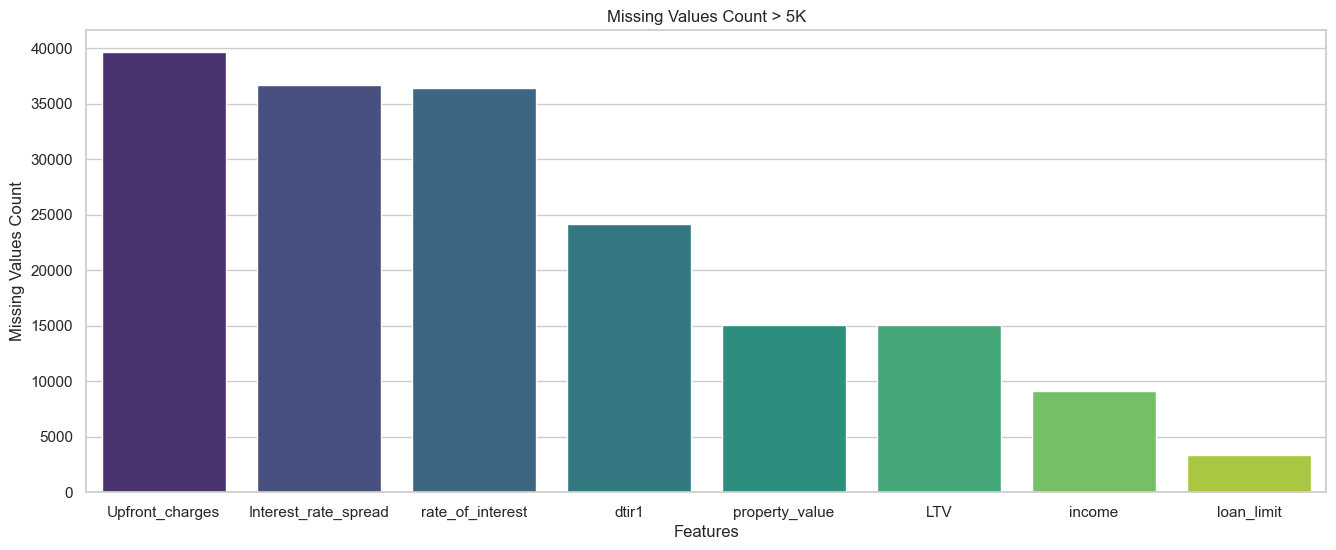

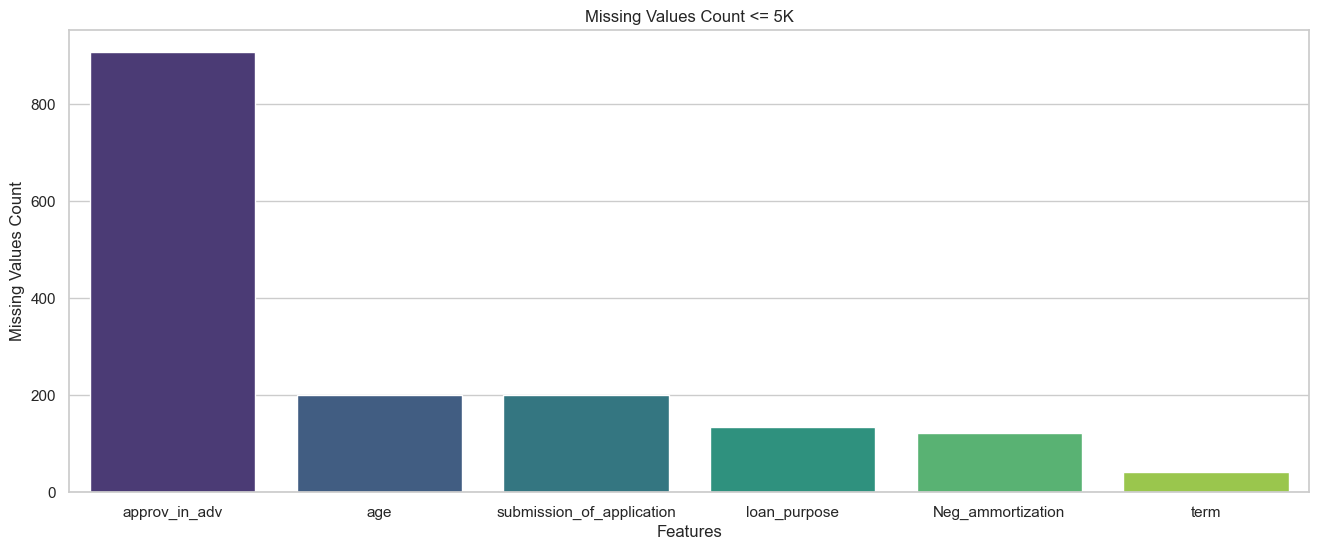

In [58]:
# Find Missing Values (Sort)
missCount = df.isnull().sum()[df.isnull().sum() > 0]
missCountGT5k = missCount[missCount > 3000].sort_values(ascending = False)
missCountLT5k = missCount[missCount <= 3000].sort_values(ascending = False)

# Create Seaborn Bar Plot GT3k
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCountGT5k.index, y = missCountGT5k.values, palette = "viridis")
plt.title('Missing Values Count > 5K')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

# Create Seaborn Bar Plot LT3k
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCountLT5k.index, y = missCountLT5k.values, palette = "viridis")
plt.title('Missing Values Count <= 5K')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

Using this information, we can make informed decisions about which columns to retain and which to discard. The columns we will eliminate are as follows:

- `ID`: The 'ID' column is a unique identifier for each row, which doesn't provide any useful information.
- `year`: The 'year' column is dropped because it doesn't change over the dataset and hence, doesn't provide any useful information.
- `Upfront_charges`, `income`: We impute the 'Upfront_charges' and 'income' columns with 0. This is done under the assumption that a missing value in these columns means that there were no upfront charges or income.
- `Interest_rate_spread`, `rate_of_interest`: These columns are dropped because they have 35000+ missing values. Imputing such a large number of missing values could introduce significant bias into the model, and we retain large amounts of data even without this.
- `dtir1`: The 'dtir1' column is dropped because it would be difficult to accurately impute the over 20000 missing values for this column. Imputing these values could introduce bias into the model, similarly to the 'Interest_rate_spread' and 'rate_of_interest' columns.
- `property_value`: We fill in missing values in the 'property_value' column with the median property value. The median is used because it is less sensitive to outliers than the mean.
- `LTV`: We calculate missing 'LTV' (Loan to Value) values from the 'loan_amount' and 'property_value' columns. This is a reasonable approach because LTV is typically calculated as the loan amount divided by the property value.

As for `loan_limit`, `approv_in_adv`, `age`, `submission_of_application`, `loan_purpose`, `Neg_ammortization`, `term`, we eliminate rows with missing values because they constitute a minor portion of the dataset. Moreover, these features play a significant role in the dataset, which we'll examine in greater depth later. Note we will not explain the removed columns in terms of summary statistics.

In [59]:
# ID Incremental, Year Stagnant - Remove
df.drop(['ID', 'year'], axis = 1, inplace = True)

# Impute NA Values With Zero (Reasonable Assumption)
df['Upfront_charges'].fillna(0, inplace = True)
df['income'].fillna(0, inplace = True)

# Remove Interest Rate Spread, Rate Of Interest - Too Many Rows!
df.drop(['Interest_rate_spread', 'rate_of_interest'], axis = 1, inplace = True)

# Would Be Hard To Impute Missing Values For Debt To Income Ratio
df.drop(['dtir1'], axis = 1, inplace = True)

# Replace Missing Property Value With Column Median
df['property_value'].fillna(df['property_value'].median(), inplace = True)

# Calculate Missing LTV Values From Loan Amount / Property Value (Formula)
df['LTV'].fillna(df['loan_amount'] / df['property_value'], inplace = True)

# Drop NA Values (Few Columns, Little Change In Shape)
df.dropna(subset = ['loan_limit', 'approv_in_adv', 'age', 'submission_of_application', 'loan_purpose', 'Neg_ammortization', 'term'], inplace = True)

# Print Shape
print(df.shape)

# Find Columns with Missing Remaining Values
print(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False))

(143942, 29)
Series([], dtype: int64)


#### **2.3.3: Explore Unique Values for Columns with ≤10 Unique Values**

While the table above that we created provides some more context about what each variable likely represents in the Loan Default Dataset, it does not necessarily address the individual unique values that appear in each row of a given column. Hence, we believe that outputting all the individual values that appear for each single column will provide us with more context for each column with not too many unique values. We arbitrarily will output all values of a column that do not have more than 10 unique values for each column, so that we can provide ourselves with more context for these variables, especially if  column(s) have a couple of string values that need to be numerically assigned given the context of the problem.

In [67]:
# Create a new DataFrame to input new columns into as we get
# more context for each variable.
df_interpretable = pd.DataFrame()

In [68]:
# Print Unique Values For Each Column as long as there's 10 or less unique vals
has_less_than_or_equal_to_10_values: pd.Series = (
    df.nunique()[df.nunique() <= 10].keys()
)

# Take wanted columns using boolean indexing
for col in df[has_less_than_or_equal_to_10_values]:
    print("\n" + col + ":")

    # Get the count of each unique value, including NaNs
    counts: pd.Series = df[col].value_counts(dropna=False)

    # Explicitly calculate the NaN percentage
    nan_percentage = df[col].isna().sum() / len(df) * 100
    if nan_percentage > 0:
        print(f"NaN -> {nan_percentage:.2f}%")

    # Calculate the percentage for each value
    percentages: pd.Series = (counts / len(df)) * 100

    for value, percentage in percentages.items():
        if not pd.isna(value):  # Avoid printing NaN again
            print(f"{value} -> {percentage:.2f}%")

# Code generated with ChatGPT with the following prompt to save time:
# """
# has_less_than_or_equal_to_10_values: pd.Series = (
#     df.nunique()[df.nunique() <= 10].keys()
# )

# for col in df[has_less_than_or_equal_to_10_values]:
#     print(col, ":", df[col].unique())

# Expand on this Python code to output the percentages of each unique value
# appearance with respect to the entire dataset.
# """


loan_limit:
cf -> 93.22%
ncf -> 6.78%

Gender:
Male -> 28.47%
Joint -> 27.92%
Sex Not Available -> 25.27%
Female -> 18.34%

approv_in_adv:
nopre -> 84.06%
pre -> 15.94%

loan_type:
type1 -> 76.18%
type2 -> 13.84%
type3 -> 9.99%

loan_purpose:
p3 -> 37.57%
p4 -> 37.19%
p1 -> 23.05%
p2 -> 2.18%

Credit_Worthiness:
l1 -> 95.62%
l2 -> 4.38%

open_credit:
nopc -> 99.63%
opc -> 0.37%

business_or_commercial:
nob/c -> 86.16%
b/c -> 13.84%

Neg_ammortization:
not_neg -> 90.03%
neg_amm -> 9.97%

interest_only:
not_int -> 95.26%
int_only -> 4.74%

lump_sum_payment:
not_lpsm -> 97.65%
lpsm -> 2.35%

construction_type:
sb -> 99.98%
mh -> 0.02%

occupancy_type:
pr -> 93.00%
ir -> 4.90%
sr -> 2.10%

Secured_by:
home -> 99.98%
land -> 0.02%

total_units:
1U -> 98.54%
2U -> 0.99%
3U -> 0.26%
4U -> 0.21%

credit_type:
CIB -> 32.46%
CRIF -> 29.56%
EXP -> 27.83%
EQUI -> 10.14%

co-applicant_credit_type:
CIB -> 50.05%
EXP -> 49.95%

age:
45-54 -> 23.40%
35-44 -> 22.10%
55-64 -> 21.91%
65-74 -> 13.99%
25-

There are a lot of extremely important insights that we can gage from these unique values:

- `year`
  - The only year in this dataset is 2019, meaning that the dataset as a whole is representative of 2019 and 2019 only. This phenomenon allows us to remove `year` as a predition variable entirely, because since there is only 1 unique value for it throughout out dataset, it has the same prediction capability impact inside this dataset as a standalone coefficient. However, this doesn't mean we should ignore the `year` column contextually whatsoever. We should not assume that variables that effect the probability of defaulting on a lone in 2019 are the same variables that effect thr probability of loan defaults in another year like 2023. While it is likely that there is a similarity and that the years don't make everything drastically different, we should interpret our model performance with a grain of salt, especially because in order for this model to be profitable and useful, it would need to perform extremely well in the present-day, which is data we do not have for training a model to predict loan defaults.
- `loan_limit`
  - Besides for nulls, only `cf` and `ncf` appear in the dataset. We believe that these are acronyms for "conforming" and "non-conforming", and there is existing literature on loans out on the internet that we believe backs this belief.
  - According to <a href="https://www.bankrate.com/mortgages/conforming-loan-nonconforming-loan-whats-the-difference/">BankRate</a>, conforming loan sizes "fit within the loan limits determined each year by the Federal Housing Finance Agency (FHFA) and meet the underwriting guidelines set by the Dodd-Frank Act and the Consumer Finance Protection Bureau." As opposed to non-conforming loans, conforming loans "generally have lower interest rates, which reduces the cost of borrowing over the lifetime of the loan." This leads us to assume that conforming loans are more reliable and desirable for banks and lending institutions, making them more sought out for since they may effect the ______???
  - For imputing this value into our interpretable DataFrame in a way that makes sense, we believe we should create a column that mainly contains **one-hot-encodings** for if a loan is conforming loan, where conforming loan is represented with `1` and known non-conforming loans are represented with `0`. (It isn't right now, it is represented by booleans)



In [69]:
# Impute a variable for conforming loans into the dataset
def create_conforming_loan_column(loan_limit_value: str) -> float:
    if loan_limit_value == "cf":
        return True
    elif loan_limit_value == "ncf":
        return False


df_interpretable["is_conforming_loan"] = df["loan_limit"].apply(
    create_conforming_loan_column
)

In [70]:
df_interpretable["is_conforming_loan"].unique()

array([ True, False])

- `Gender`
  - The possible outputs in the `Gender` column are `Male`, `Joint`, `Sex Not Available`, and `Female`.
  - We are somewhat hesitant about using some numerical representation of `Gender` as a predictor variable for a multiple reasons:
    1. 25.33% of the Gender values have the `Sex Not Available` label, which is basically the equivalent of a `NaN` or `Null` value. We can lump this with the `Male` and `Female` genders since they do not classify as `Joint`, but this requires an assumption.
    2. A machine learning model that takes gender into consideration for predicting loan defaults can have sexist implications and cause financial institutions to reject loan applications on the basis of gender without even realizing it, especially if they're using a Machine Learning model as a black-box.
  - While using gender as a factor in prediction would be a poor idea in our opinion for the reasons above, we can still get important use out of this dataset. The `Joint` unique value in the `Gender` column indicates and explicitly states that an application is a joint application, which could likely be a predictor of loan defaults. A large chunk of joint applications may likely represent partnerships of some sort, so we believe that would be an interesting phenomenon to explore, as opposed to `Gender`.

In [71]:
def create_joint_application_column(gender_value: str) -> bool:
    if gender_value == "Joint":
        return True
    else:
        return False


df_interpretable["is_joint_application"] = df["Gender"].apply(
    create_joint_application_column
)

In [72]:
df_interpretable["is_joint_application"].unique()

array([False,  True])

- `approv_in_adv`
  - Most applications were not approved in advance at 83.82%, and there are a small portion of `NaN` values at 0.61% where approvals in advance were not noted.
  - We believe it may be safe to say here that approvals in advance are all logged because it is relevant to note that, especially since it is more infrequent for that to happen as opposed to them not getting an approval in advance like usual. Because of this, all `NaN` values will be assumed that they were not approved in advance. In statistical terms, the `NaN` is being imputed with the mode, not approved in advance.
  - We will **one-hot-encode** a feature into our interpretable DataFrame that represents if a loan was approved in advance.

In [73]:
def create_approved_in_advance_column(approv_in_adv_value: str) -> bool:
    return approv_in_adv_value == "pre"


df_interpretable["was_approved_in_advance"] = df["approv_in_adv"].apply(
    create_approved_in_advance_column
)

In [74]:
df_interpretable["was_approved_in_advance"].unique()

array([False,  True])

- `loan_type`
  - There are 3 different types of loans in this dataset: `type1`, `type2`, and `type3`. The issue here is that we do not have much context for understading the meaning of these loan types. This could mean anything from short-, medium-, and long-term loans to fixed-interest, variable-interest, or interest-only loans. Because of this problem, we will not include `loan_type` in our interpretable DataFrame. Especially since 76.12% of the loans are Type 1 loans, we believe that keeping this in our dataset is not worth it because the values will not be interpretable, nor would they be useful for validation data that a bank puts into the model because they would not be able to decipher how to label the `loan_type` that they're trying to predict.
- `loan_purpose`
  - The `loan_purpose` values of `p1`, `p2`, `p3`, and `p4` are similarly generic categorical labels that don't provide specific information without further context. In order for this data to be a useful and interpretable predictor, more context would be needed for understanding so that banks could input purposes as inputs into a Machine Learning model that predicts loan defaults. These unique values are more evenly distributed in our dataset than `loan_type`, so unfortunately some important context is being lost here by withholding this variable from our interpretable dataset. Nevertheless, it is essential to do so, especially if we want a predictive model to be useful outside of a stagnant Jupyter notebook.  
- `Credit_Worthiness`
  - The `Credit_Worthiness` values of `l1` and `l2` likely indicate whether a borrower has had a historical track record of being on time with their loan payments. This dataset is specifically choosing to look at `l1` and `l2` ratings, specifically focusing on people that have had really good records of paying back on time. According to <a href="https://jrwtopbeacon.com/post_type_faq/what-does-a-rating-of-r1-r2-r3-r4-r5-r6-r7-r8-or-r9-mean">JRW Top Beacon Inc.</a>, the difference between these two labels is that `l1` has never had a significantly late payment, and `l2` has had at least 1 late payment over 30 days late but less than 60 days late. Assuming these naming conventions are correct, this would tell us a lot about the scope of our dataset.
    - For one, the lack of `l0` being included in this dataset tells us that the dataset's scope is limited to borrowers who are not just establishing a newly formed history with a creditor. This means that a trained model for predicting loan defaults based off of this dataset would not apply to borrowers who are just newly starting their relationship with a .
    - No value after `l2` is being included in this dataset at all. This could mean that (1) borrowers with a credit worthiness score higher than `l2` were filtered out of this dataset before it was openly distributed on Kaggle, likely due to the fact that any credit worthiness score greater than `l2` would almost immediately lead to a loan default, or (2) the banks and lending institutions that created this dataset genuinely have never had a borrower be more than 60 days late on a payment without defaulting on their loan. We highly doubt that (2) is true, given the dataset has almost 150,000 rows, so we will proceed with high confidence that values after `l2` were filtered out entirely.
  - We will **one-hot-encode** a `has_paid_late_before` variable into our interpretable dataframe to later investigate whether a relationship exists between having paid late before once and defaulting on a loan.

In [75]:
def create_has_paid_late_before_column(credit_worthiness_value: str) -> bool:
    return credit_worthiness_value == "l2"


df_interpretable["has_paid_late_before"] = df["Credit_Worthiness"].apply(
    create_has_paid_late_before_column
)

In [76]:
df_interpretable["has_paid_late_before"].unique()

array([False,  True])

- `open_credit`
  - Most applicants don't have open lines of credit based on `nopc` taking up 99.63% of the total values in our dataset, but there are still some who do. A **one-hot-encoded** `has_open_credit` variable can be feature engineered to a dataset, and then we can later check if having other open lines of credit can be a significant predictor variable for determining loan defaults.

In [77]:
def create_has_open_credit_column(open_credit_value: str) -> bool:
    return open_credit_value == "opc"


df_interpretable["has_open_credit"] = df["open_credit"].apply(
    create_has_open_credit_column
)

In [78]:
df_interpretable["has_open_credit"].unique()

array([False,  True])

- `business_or_commercial`
  - The vast majority of borrowers in this dataset at 86.03% submitted loan applications with the intent of them not being for business or commercial use, and the context for this phenomenon in the dataset is clear and undeniable, because `nob/c` is the label for no and `b/c` is the label for yes. This context means that the vast majority of borrowers likely aimed to get a loan for buying a house, car, or college education instead of starting a business or expanding an already existing business.
  - We will **one-hot-encode** an `is_business_or_commercial` column into the interpretable dataframe, so that a clear distinction for the intention of loan can be identified. Then, we can check if there exists a strong relationship between whether or not a loan is for business or commercial purposes and loan defaults.

In [79]:
def create_is_business_or_commercial_column(business_or_commercial_value: str) -> bool:
    return business_or_commercial_value == "b/c"


df_interpretable["is_business_or_commercial"] = df["business_or_commercial"].apply(
    create_is_business_or_commercial_column
)

In [80]:
df_interpretable["is_business_or_commercial"].unique()

array([False,  True])

- `Neg_ammortization`
  - To recall, when negative ammortization occurs, that means that a borrower's payment on a loan at some point did not exceed the rate of interest, causing the borrower to owe more to a bank or lending institution than the payment period before. We suspect that having negative ammortization associated with a borrower's loan would definitely lead to a more likely chance for a borrower to eventually default on their loan.
  - There is a caveat however when it comes to the practical use of this attribute. If our goal is to use this model to determine whether a bank or lending institution should accept a loan application, this variable has no use, because it allows for us to see into the future and identify borrowers' payment habits once they accept a loan that banks have not accepted yet. Within that business context, we would not be able to use this model on deployment with this attribute as a predictor, because we would not have access to it when the only data we have on the applicant is their information as an applicant and not their borrowing habits. Hence, we believe we should not include this attribute in our dataset.

- `interest_only`
  - The vast majority of loans in this dataset are not interest-only loans. According to <a href="https://www.cnbc.com/2022/05/16/pros-and-cons-of-interest-only-mortgages.html">CNBC</a>, the interest-only loans may be considered to be more risky, as they typically charge higher interest rates than conventional mortgages, and they typically cause a borrower to have to pay more over time because of how the interest adds up. This phenomenon could mean that a trend between a loan being interest-only could lead to a higher likeliness of a loan default, so we should keep the variable inside our dataset.
  - We will **one-hot-encode** interest-only loans into our interpretable dataframe.

In [81]:
def create_interest_only_loan_column(interest_only_value: str) -> bool:
     return interest_only_value == "int_only"


df_interpretable["interest_only_loan"] = df["interest_only"].apply(
    create_interest_only_loan_column
)

In [82]:
df_interpretable["interest_only_loan"].unique()

array([False,  True])

- `lump_sum_payment`
  - Most of the loans in the dataset do not represent lump sum payments. The 2.28% that do allow for these payments cater to borrowers who might have the capacity to clear larger chunks of their debt at once. This likely means that lump sum payment loans have a lower risk of defaulting because of the nature of the borrowers who tend to take these loans, however I think we should check how this variable behaves in our dataset.
  - We should **one-hot-encode** a lump sum payment loan column into our interpretable dataframe to explore its relationship with the other variables.

In [83]:
def create_lump_sum_payment_column(interest_only_value: str) -> bool:
     return interest_only_value == "lpsm"


df_interpretable["lump_sum_payment"] = df["lump_sum_payment"].apply(
    create_lump_sum_payment_column
)

In [84]:
df_interpretable["lump_sum_payment"].unique()

array([False,  True])

- `construction_type`
  - The two values (`sb`, `mh`) are difficult to interpet in the context of this dataset. These values could maybe represent stick-built and manufactured  according to <a href="https://aspire-communities.com/manufactured-homes-vs-stick-built/">this source</a>, but we believe we don't have enough context to confirm this is true before proceeding. Thus, we do not believe that we should this variable into our analysis, because banks would likely not be able to replicate construction type as an input.
- `occupancy_type`
  - The occupancy types here likely relate to primary residence (`pr`), secondary residence (`sr`), and investment property (`ir`), according to <a href="https://www.chase.com/personal/mortgage/education/buying-a-home/different-types-of-properties">Chase Bank & Co</a>. This is confusing, however, because ~15% of the loans are considering to be for commercial purposes. We now are altering our assumptions from before and confirming that this data does in fact represent loans that are all related to residential to real estate. We are explaining the commercial loan discrepency by emphasizing that many borrowers may be writing off their loans as commercial to potentially get a tax break. We doubt that all of these 14% of variables represent businesses ran out of homes, which is why we are making that conclusing, but proceeding with the newfound insight that we are looking strictly at residential real estate loans.
  - We believe we should **one-hot-encode** 3 separate variables into our interpretable dataframe to find out how property ownership intension relates to loan defaults.


In [85]:
def create_primary_residence_column(occupancy_type_value: str) -> bool:
     return occupancy_type_value == "pr"
def create_secondary_residence_column(occupancy_type_value: str) -> bool:
     return occupancy_type_value == "sr"
def create_investment_property_column(occupancy_type_value: str) -> bool:
     return occupancy_type_value == "ir"

df_interpretable["primary_residence"] = df["occupancy_type"].apply(
    create_primary_residence_column
)
df_interpretable["secondary_residence"] = df["occupancy_type"].apply(
    create_secondary_residence_column
)
df_interpretable["investment_property"] = df["occupancy_type"].apply(
    create_investment_property_column
)

In [86]:
for colname in ["primary_residence", "secondary_residence", "investment_property"]:
    print(df_interpretable[colname].unique())

[ True False]
[False  True]
[False  True]


- `Secured_by`
  - Most of these loans have home as collateral, and few have land securing the home as collateral. Land loans might have a different risk profile than home loans, so we should evaluate this by **one-hot-encoding** land loans into our interpretable dataframe.

In [87]:
def create_secured_by_land_column(secured_by_value: str) -> bool:
     return secured_by_value == "land"


df_interpretable["secured_by_land"] = df["Secured_by"].apply(
    create_secured_by_land_column
)

In [88]:
df_interpretable["secured_by_land"].unique()

array([False,  True])

- `total_units`
  - Most of the total units are equal to 1, however there are some residential properties with 2, 3, and 4 properties. We should convert the current format of these values to integers so that they are machine interpretable.

In [89]:
df_interpretable["total_units"] = df["total_units"].map({
    "1U": 1,
    "2U": 2,
    "3U": 3,
    "4U": 4,
})

In [90]:
df_interpretable["total_units"].unique()

array([1, 2, 3, 4], dtype=int64)

- `credit_type` and `co-applicant_credit_type`
  - The

#### **2.3.4: Explore Unique Values for Columns with >10 Unique Values**

In [91]:
# Modified from code in section 2.3.3
# Print Unique Values For Each Column as long as there's more than 10 unique vals
has_more_than_10_values: pd.Series = (
    df.nunique()[df.nunique() > 10].keys()
)

# Take wanted columns using boolean indexing
for col in df[has_more_than_10_values]:
    print("\n" + col + ":")

    # Get the count of each unique value, including NaNs
    counts: pd.Series = df[col].value_counts(dropna=False)

    # Explicitly calculate the NaN percentage
    nan_percentage = df[col].isna().sum() / len(df) * 100
    if nan_percentage > 0:
        print(f"NaN -> {nan_percentage:.2f}%")

    # Calculate the percentage for each value
    percentages: pd.Series = (counts / len(df)) * 100

    for value, percentage in percentages.items():
        if not pd.isna(value):  # Avoid printing NaN again
            print(f"{value} -> {percentage:.2f}%")


loan_amount:
206500 -> 3.10%
256500 -> 2.72%
156500 -> 2.66%
226500 -> 2.64%
486500 -> 2.58%
306500 -> 2.47%
246500 -> 2.46%
216500 -> 2.44%
236500 -> 2.39%
266500 -> 2.39%
186500 -> 2.31%
176500 -> 2.30%
276500 -> 2.30%
286500 -> 2.28%
166500 -> 2.24%
106500 -> 2.14%
126500 -> 2.10%
326500 -> 2.06%
296500 -> 2.06%
316500 -> 2.04%
196500 -> 1.98%
356500 -> 1.95%
136500 -> 1.93%
406500 -> 1.92%
146500 -> 1.85%
336500 -> 1.83%
346500 -> 1.82%
366500 -> 1.79%
376500 -> 1.68%
386500 -> 1.65%
116500 -> 1.59%
396500 -> 1.58%
456500 -> 1.58%
426500 -> 1.50%
416500 -> 1.47%
446500 -> 1.45%
436500 -> 1.42%
476500 -> 1.28%
466500 -> 1.26%
76500 -> 1.12%
86500 -> 1.07%
96500 -> 1.00%
726500 -> 0.88%
526500 -> 0.86%
506500 -> 0.84%
556500 -> 0.81%
516500 -> 0.80%
546500 -> 0.77%
536500 -> 0.72%
566500 -> 0.71%
496500 -> 0.70%
606500 -> 0.70%
576500 -> 0.66%
586500 -> 0.64%
596500 -> 0.60%
66500 -> 0.58%
626500 -> 0.55%
616500 -> 0.55%
56500 -> 0.54%
676500 -> 0.53%
636500 -> 0.47%
646500 -> 0.45%

### **2.x: Null Values in the Dataset**

In [92]:
# Find NA values in the dataset
# df_interpretable.isna().sum()
print(df_interpretable)

        is_conforming_loan  is_joint_application  was_approved_in_advance  \
0                     True                 False                    False   
1                     True                 False                    False   
2                     True                 False                     True   
3                     True                 False                    False   
4                     True                  True                     True   
...                    ...                   ...                      ...   
148665                True                 False                    False   
148666                True                 False                    False   
148667                True                 False                    False   
148668                True                 False                    False   
148669                True                 False                    False   

        has_paid_late_before  has_open_credit  is_business_or_commercial  \

Converting 2 unique value columns to binary representations

In [ ]:
# EILEEN LOOK AT THIS UWU

#def to_int(a:str) -> int:
    #return int(a[:-1]) - 1

categorical_columns = []
for col in ldData[ldData.nunique()[ldData.nunique() == 2].keys()]:
    categorical_columns.append(col)
    print(col, ":", ldData[col].unique())

print(categorical_columns)
# For now NaNs are still in here and unmapped (aka left as NaNs) because eventually they'll be removed?

# Create a dictionary to map unique values to 0 or 1
value_to_int_mapping = {
    "ncf": 0,
    "cf": 1,
    "nopre": 0,
    "pre": 1,
    "l1": 0,
    "l2": 1,
    "nopc": 0,
    "opc": 1,
    "nob/c": 0,
    "b/c": 1,
    "not_neg": 0,
    "neg_amm": 1,
    "not_int": 0,
    "int_only": 1,
    "not_lpsm": 0,
    "lpsm": 1,
    "sb": 0,
    "mh": 1,
    "home": 0,
    "land": 1,
    "CIB": 0,
    "EXP": 1,
    "to_inst": 0,
    "not_inst": 1,
    "direct": 0,
    "Indriect": 1
}

# Convert any objects with 2 unique values to binary values

for col in categorical_columns:
    unique_values = ldData[col].unique()
    for i, value in enumerate(unique_values):
        value_to_int_mapping[value] = i
    ldData[col] = ldData[col].map(value_to_int_mapping)

print(ldData.head)

# One Hot Encode any objects with 3 or more unique values

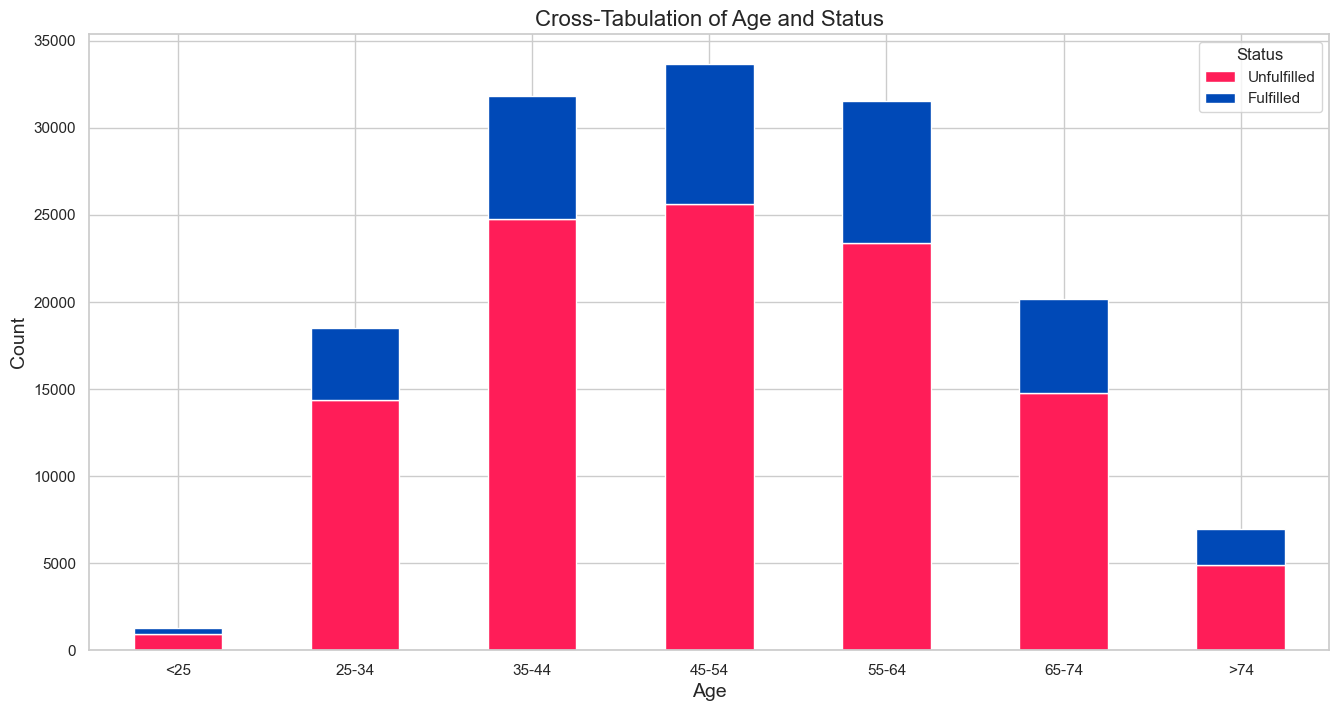

In [93]:
# Create Cross-Tabulation Of Age, Status
ldDataCrossTab = pd.crosstab(df['age'], df['Status'])

# Order By List Of Values In Age Column
ldDataCrossTab = ldDataCrossTab.reindex(sorted(ldDataCrossTab.columns), axis = 1)

# Move Unsorted Row To Top
ldDataCrossTab = ldDataCrossTab.reindex(['<25'] + list(ldDataCrossTab.index.drop('<25')), axis = 0)

# Create The Plot
ldDataCrossTab.plot(kind = 'bar', stacked = True, figsize = (16, 8), color = ['#FF1D58', '#0049B7'])

# Add Labels, Fix Rotation, Add Legend
plt.title('Cross-Tabulation of Age and Status', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 0)
plt.legend(title = 'Status', labels = ('Unfulfilled', 'Fulfilled'))

# Show Plot
plt.show()

# Not many <25, meaning college students are (probably) not included in the dataset
# Observation: The graph shows that loan status (fulfilled 1 or unfulfilled 0)
# is not the same across all age groups. There are some age groups where loan
# fulfillment is more common, and others where loan non-fulfillment is more common. 
# This means that age might be an important factor in whether a loan is fulfilled 
# or not, and we should look into it more to find out why. In order to determine 
# if there is a statistically significant difference in loan fulfillment between 
# these groups, we should conduct a Chi2 test that accounts for the differences in sample size

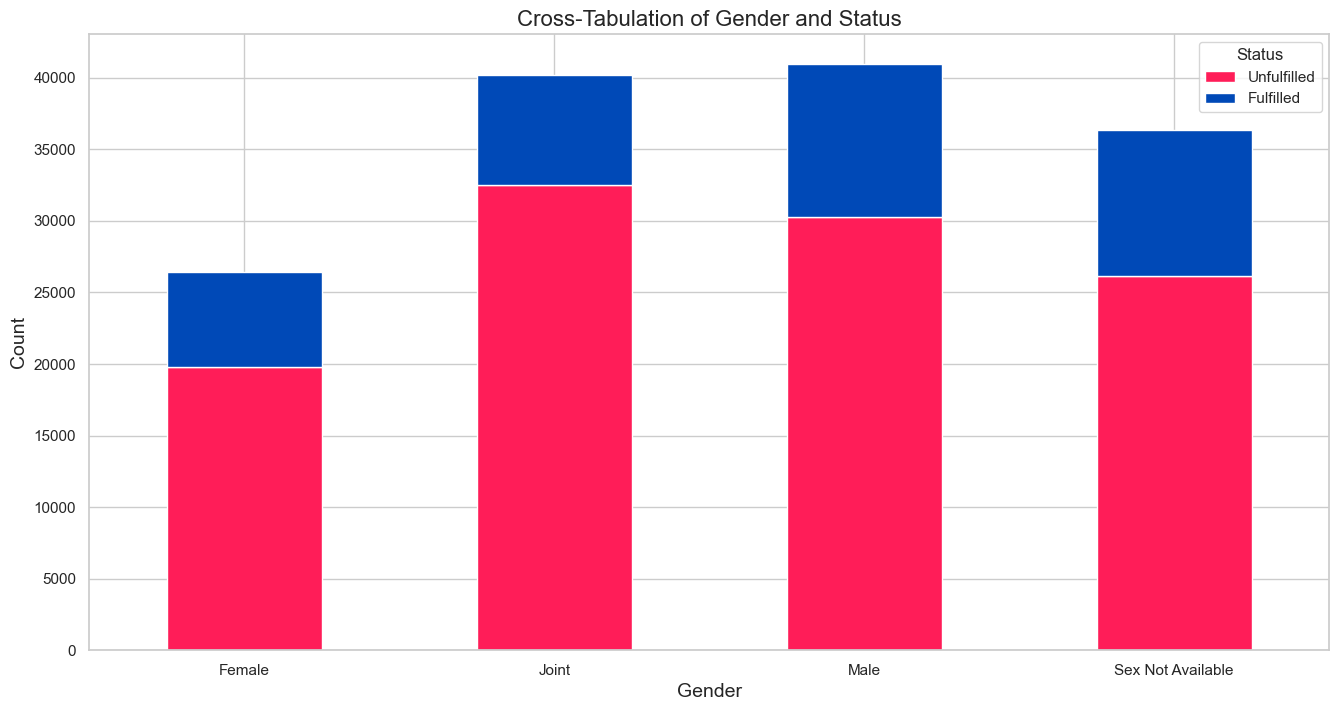

In [94]:
# Create Cross Tabulation Of Gender, Status
ldDataCrossTab = pd.crosstab(df['Gender'], df['Status'])

# Create The Plot
ldDataCrossTab.plot(kind = 'bar', stacked = True, figsize = (16, 8), color = ['#FF1D58', '#0049B7'])

# Add Labels, Fix Rotation, Add Legend
plt.title('Cross-Tabulation of Gender and Status', fontsize = 16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation = 0)
plt.legend(title = 'Status', labels = ('Unfulfilled', 'Fulfilled'))

# Show Plot
plt.show()

In [95]:
# Get Float Columns From Dataframe
dfFloatData = df.select_dtypes(include = ['float64']).values
scaledFloatData = StandardScaler().fit_transform(dfFloatData)

In [96]:
# Plot Float Values With Status Hue
sns.pairplot(df[["Upfront_charges", "term", "property_value", "income", "Status"]], hue = "Status")
plt.show()

In [ ]:
# Look Specifically At Loan Default Status == 1 (Defaulted)
sns.pairplot(df[df['Status'] == 1][["Upfront_charges", "term", "property_value", "income", "Status"]], hue = "Status")
plt.show()

# This Plot Shows That Whenever The Loan Defaulted, The Upfront Charges Were 0.0

In [ ]:
# Create Mapper
dataMapper = umap.UMAP().fit(scaledFloatData)